In [2]:
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.datasets import make_moons


In [3]:
from sklearn.cluster import DBSCAN

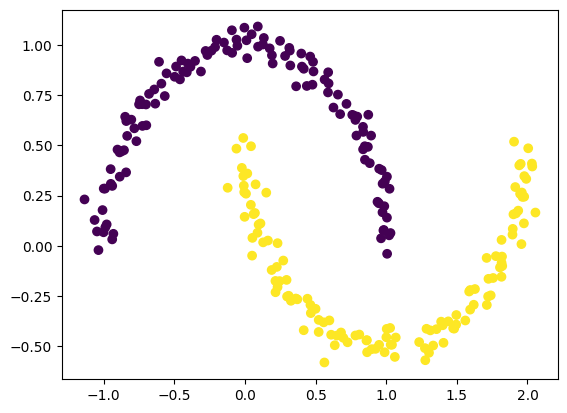

In [18]:
X,Y=make_moons(n_samples=250,noise=0.05)
plt.scatter(X[:,0],X[:,1],c=Y)
plt.show()

In [19]:
#feature scaling
from sklearn.preprocessing import StandardScaler 
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)


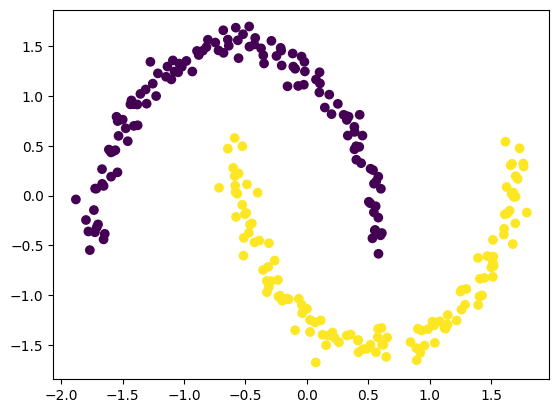

In [22]:
dbcan=DBSCAN(eps=0.3)
dbcan.fit(X_scaled)
dbcan.fit_predict(X_scaled)
plt.scatter(X_scaled[:,0],X_scaled[:,1],c=dbcan.labels_)

In [23]:
#Silhouette score
from sklearn.metrics import silhouette_score
score=silhouette_score(X_scaled,dbcan.labels_)
print(score)

0.3806776706158503


In [33]:
for eps in [0.2, 0.25, 0.3, 0.35, 0.1]:
    db = DBSCAN(eps=eps)
    labels = db.fit_predict(X_scaled)

    mask = labels != -1
    if len(set(labels[mask])) >= 2:
        score = silhouette_score(X_scaled[mask], labels[mask])
        print(f"eps={eps} → silhouette={score:.3f}")

eps=0.2 → silhouette=0.296
eps=0.25 → silhouette=0.386
eps=0.3 → silhouette=0.381
eps=0.35 → silhouette=0.381
eps=0.1 → silhouette=0.722
